<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ragnar Betancourt

**Fecha:** 12 de octubre del 2021.

**Expediente** : 717467.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6
https://github.com/betancourtp09/SPF_Tarea6_Betancourt

> Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:

1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

In [2]:
#sol1
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import math
import scipy.special as sps 
from math import factorial as fac
from scipy.stats import beta

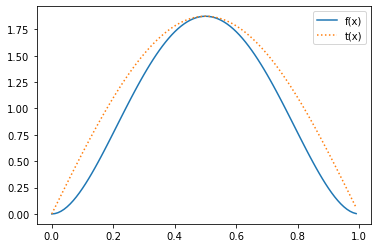

In [3]:
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False)) # Encontrar el max
# Función t 
t = lambda x: max_f*np.sin(np.pi*x)
x = np.arange(0,1,0.01)  
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),":",label='t(x)')
plt.legend(loc="best")
plt.show()

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

In [ ]:
#sol2

Tenemos 
>$ t(x) = a \cdot \sin(\pi x) $

Donde debe ser integrada en el intervalo [0,1]

$ c=\int_{0}^{1} t(x) dx  $

$ c= \int_{0}^{1} a \cdot \sin(\pi x) dx = a \int_{0}^{1} \sin(\pi x) dx = \frac{a}{\pi} (-\cos(\pi x)) \Big|_{0}^{1} = \frac{a}{\pi} (1 - (-1)) = \frac{2a}{\pi}$

Por lo tanto $g(x)$
>$g(x) = \frac{t(x)}{c} = \frac{a \pi \sin(\pi x)}{2 a} =  \frac{\pi \sin(\pi x)}{2}$

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

In [ ]:
#sol3

$g(x)=\sin(\pi x)$

Sacamos la integral

$\int_{0}^{x} sin(\pi y) \ dy = -\displaystyle\frac{1}{\pi} cos(\pi y)  |_0^x = -\frac{1}{\pi} cos(\pi x) + \frac{1}{\pi}$

Igualamos a U

$U= -\frac{1}{\pi} cos(\pi x) + \frac{1}{\pi}$


$U= \frac{1}{\pi}(- cos(\pi x) + 1)$

$\pi U= - cos(\pi x) + 1$


$cos(\pi x) = 1 - \pi U$

Por lo tanto x es:

> $x = \frac{1}{\pi} \arccos{(1- \pi U)} $

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada.

In [4]:
N=10000
def trans_g(arccos,N):
    y = (1/np.pi)*np.arccos((2*np.random.uniform(-np.pi/2,np.pi/2,N))/np.pi)
    
    return y

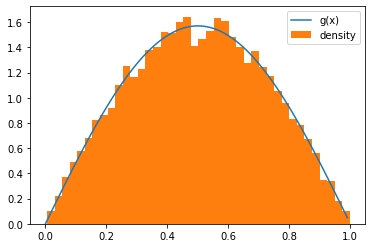

In [7]:
N = 10000
f = lambda x: 30*(x**2 - 2*x**3 +x**4)
a = f(optimize.fmin(lambda x: -f(x),0,disp=False))
t = lambda x: a*np.sin(np.pi*x)
g = lambda x: (np.pi /2)*np.sin(np.pi * x) 
x = np.arange(0,1,0.01)
R1 = trans_g(a,N)
plt.plot(x,g(x),label='g(x)')
plt.hist(R1,bins = 40, density = True, label='density')
plt.legend()
plt.show()


5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados.

In [9]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()

El máximo de f es: [1.875]


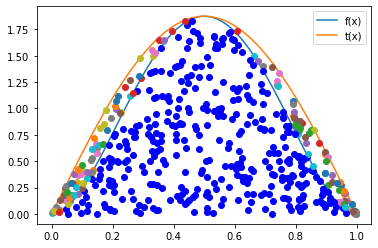

In [10]:
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t
t = lambda x: max_f*np.sin(np.pi*x)

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular

R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

In [12]:
def Acep_rechazoS(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    c=np.zeros(len(R1))
    condition = np.multiply(R2,t_x)<=f_x
    c = np.asarray([1 if condition[i] else 0 for i in range(len(R1))]).sum()
    return c

In [13]:
Aceptacion_Senoidal = Acep_rechazoS(R2,R1,f,t)/len(R1)
print('El porcentaje de puntos aceptados cuando usas un pulso senoidal es:',Aceptacion_Senoidal*100,'%')

El porcentaje de puntos aceptados cuando usas un pulso senoidal es: 69.6 %


In [14]:
# C como constante
f = lambda x:30*(x**2-2*x**3+x**4)
a = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: a*np.ones(len(x))

N = 500 
R2 = np.random.rand(N)
R1 = np.random.rand(N)

In [16]:
Aceptacion_Const= Acep_rechazoS(R2,R1,f,t)/len(R1)
print('El porcentaje de puntos aceptados cuando usas constante es:',Aceptacion_Const*100,'%')

El porcentaje de puntos aceptados cuando usas constante es: 53.6 %


El máximo de f es: [1.875]


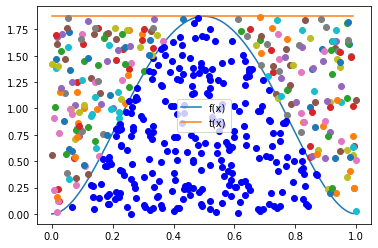

In [17]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

f = lambda x:30*(x**2-2*x**3+x**4)
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.ones(len(x)) # función constante

x = np.arange(0,1,0.01)
print('El máximo de f es:',max_f)

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()


N = 500
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

quantity_const = Acep_rechazo(R2,R1,f,t)

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

El máximo de f es: [2.109375]


(array([0.62527515, 1.82371918, 1.77161292, 2.7616319 , 1.98003797,
        1.66740039, 0.88580646, 0.4168501 , 0.52106262, 0.05210626]),
 array([0.01654209, 0.09650689, 0.17647169, 0.25643648, 0.33640128,
        0.41636608, 0.49633087, 0.57629567, 0.65626047, 0.73622526,
        0.81619006]),
 <BarContainer object of 10 artists>)

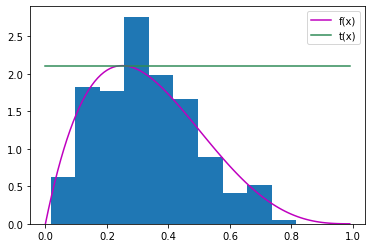

In [18]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    
    #Regresar lista de valores
    return [R1[i] for i in range(len(R1)) if condition[i]]

# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f = lambda x:20*x*(1-x)**3
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: max_f*np.ones(len(x))

x = np.arange(0,1,0.01)
print('El máximo de f es:',max_f)


plt.plot(x,f(x),label='f(x)', color='m')
plt.plot(x,t(x),label='t(x)', color='seagreen')
plt.legend()


N = 500
R2 = np.random.rand(N)
R1 = np.random.rand(N)

variables_alt = Acep_rechazo(R2,R1,f,t)
plt.hist(variables_alt, bins=10, density=True)